<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2.1 Data Preprocessing for Classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    'Age': [25, 27, 29, np.nan, 32, 33, np.nan],
    'Salary': [50000, 52000, 54000, 58000, np.nan, 64000, 66000],
    'City': ['New York', 'Los Angeles', 'New York', 'Chicago', 'Chicago', 'Los Angeles', np.nan]
}

df = pd.DataFrame(data)

# Splitting the dataset into features and target variable for illustration
X = df.dropna(subset=['City'])  # Dropping rows where 'City' is NaN for this example
y = [0, 1, 0, 1, 1, 0]  # Dummy target variable

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining preprocessing for numerical columns (impute missing values then scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Defining preprocessing for categorical columns (impute missing values then apply one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'Salary']),
        ('cat', categorical_transformer, ['City'])
    ]
)

# Applying the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# The preprocessed data is now ready for model training
# This is a numpy array, you can convert it back to a DataFrame if needed for better readability

print(" Training Data:\n", X_train)
print(" Test Data:\n", X_test)

print("Preprocessed Training Data:\n", X_train_preprocessed)

print("Preprocessed Test Data:\n", X_test_preprocessed)


#  1. `pd.DataFrame.dropna(subset=['City'])`
# - Parameters:
#   - `subset`: Column names to consider for identifying rows with missing values. Rows with NaN in these columns get dropped.
#   - `how`: Determines if row/column is removed from DataFrame when we have at least one NA or all NA. Values are `'any'` or `'all'`. Default is `'any'`.
#   - `inplace`: If `True`, do operation inplace and return None. Default is `False`.

# - Alternatives:
#   - If you want to drop rows where all specified columns are NaN, use `how='all'`.
#   - To apply the operation directly to the DataFrame without creating a copy, use `inplace=True`.

#  2. `train_test_split(X, y, test_size=0.2, random_state=42)`
# - Parameters:
#   - `X, y`: Arrays or matrices containing the dataset to split.
#   - `test_size`: Represents the proportion of the dataset to include in the test split. Can be an int (absolute number of test samples) or a float (fraction of the dataset). Default is `None`.
#   - `random_state`: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

# - Alternatives:
#   - `train_size`: Complement of `test_size`. If both are None, it will set to the default value of 0.25.
#   - `shuffle`: Whether or not to shuffle the data before splitting. Can be useful for time-series data. Default is `True`.
#   - `stratify`: If not None, data is split in a stratified fashion, using this as the class labels. Helps in maintaining the percentage of samples for each class.

#  3. `SimpleImputer(strategy='mean')`
# - Parameters:
#   - `strategy`: The imputation strategy. Choices are `"mean"`, `"median"`, `"most_frequent"`, and `"constant"`.
#   - `fill_value`: When `strategy="constant"`, fill_value is used to replace all occurrences of missing values. Default is `None`.

# - Alternatives:
#   - Using `strategy="median"` is a good alternative for numerical data, especially when the data might have outliers that could heavily influence the mean.
#   - For categorical data, `strategy="most_frequent"` or `strategy="constant"` with a specified `fill_value` (like `"missing"` or `0`) can be useful.

#  4. `StandardScaler()`
# - Parameters:
#   - `with_mean`: If `True`, center the data before scaling. Default is `True`.
#   - `with_std`: If `True`, scale the data to unit variance (or equivalently, unit standard deviation). Default is `True`.

# - Alternatives:
#   - `MinMaxScaler`: Scales features to a given range, usually between 0 and 1.
#   - `RobustScaler`: Useful if your data contains many outliers, scales data according to the percentile range.

#  5. `OneHotEncoder(handle_unknown='ignore')`
# - Parameters:
#   - `handle_unknown`: Options are `"error"` or `"ignore"`. Determines what happens when the encoder encounters a category not seen during fit. If `"ignore"`, the unknown category is ignored (encoded as all zeros).
#   - `sparse`: Whether the transformed output is a sparse matrix or a 2D array. Default is `True`.

# - Alternatives:
#   - `LabelEncoder`: Good for encoding target labels (y) rather than input (X) features.
#   - `OrdinalEncoder`: Transforms categorical features to ordinal integers. Useful when the categorical features have a natural order.

#  6. `ColumnTransformer`
# - Parameters:
#   - `transformers`: List of transformers to apply. Each transformer is a tuple containing a name, transformer object, and column(s) to apply the transformer to.
#   - `remainder`: Determines what to do with the remaining columns not explicitly selected in `transformers`. Options are `'drop'` (default), `'passthrough'`, or a transformer object to apply.





#  `random_state=42` in `train_test_split`
# The `train_test_split` function from `scikit-learn` is used to split the dataset into training and testing sets. Here, `random_state` is set to 42, which serves as a seed for the random number generator. This ensures that the split is reproducible; anyone running this code with `random_state` set to 42 will get the exact same training and testing sets. This is particularly useful for educational purposes, demonstrations, or scenarios where you want to ensure consistent results across different runs for debugging or comparison purposes.

#  `X_train_preprocessed = preprocessor.fit_transform(X_train)`
# This line applies the preprocessing steps defined in the `preprocessor` to the training data (`X_train`). The `preprocessor` is a `ColumnTransformer` that combines both numerical and categorical transformations:

# - For numerical columns (`'Age'`, `'Salary'`), it first imputes missing values using the mean (with `SimpleImputer(strategy='mean')`), and then standardizes the features (with `StandardScaler()`), which scales the features to have a mean of 0 and a standard deviation of 1.

# - For the categorical column (`'City'`), it first imputes missing values by replacing them with the most frequent category (with `SimpleImputer(strategy='most_frequent')`), and then applies one-hot encoding (with `OneHotEncoder(handle_unknown='ignore')`), which converts the categorical variable into a format that can be provided to machine learning algorithms (creating a binary column for each category).

# The `fit_transform` method on the `preprocessor` does two things: it first `fit`s the transformers to the training data, learning any necessary parameters (like the mean and standard deviation for scaling, or the categories for one-hot encoding), and then `transform`s the training data according to these parameters, outputting the preprocessed data ready for model training.

#  `X_test_preprocessed = preprocessor.transform(X_test)`
# After the `preprocessor` has been fitted to the training data, it is used to transform the test data (`X_test`) using the same `transform` method. However, since the `preprocessor` has already been fitted, it uses the parameters learned from the training data (not from `X_test`). This ensures that the test data is preprocessed in exactly the same way as the training data, which is crucial for the model to make accurate predictions on the test data. This step does not involve fitting (`fit`) the `preprocessor` again to the test data, as that would lead to data leakage and overfitting.

# In this workflow, the preprocessed training and test data are represented as numpy arrays. If needed for better readability or for further processing that requires a DataFrame structure, these arrays can be converted back into pandas DataFrames, although the column names for the one-hot encoded variables would need to be manually specified or extracted from the `preprocessor`.

 Training Data:
     Age   Salary         City
5  33.0  64000.0  Los Angeles
2  29.0  54000.0     New York
4  32.0      NaN      Chicago
3   NaN  58000.0      Chicago
 Test Data:
     Age   Salary         City
0  25.0  50000.0     New York
1  27.0  52000.0  Los Angeles
Preprocessed Training Data:
 [[ 1.13227703  1.4985373   0.          1.          0.        ]
 [-1.58518785 -1.31122014  0.          0.          1.        ]
 [ 0.45291081  0.          1.          0.          0.        ]
 [ 0.         -0.18731716  1.          0.          0.        ]]
Preprocessed Test Data:
 [[-4.30265273 -2.43512311  0.          0.          1.        ]
 [-2.94392029 -1.87317162  0.          1.          0.        ]]


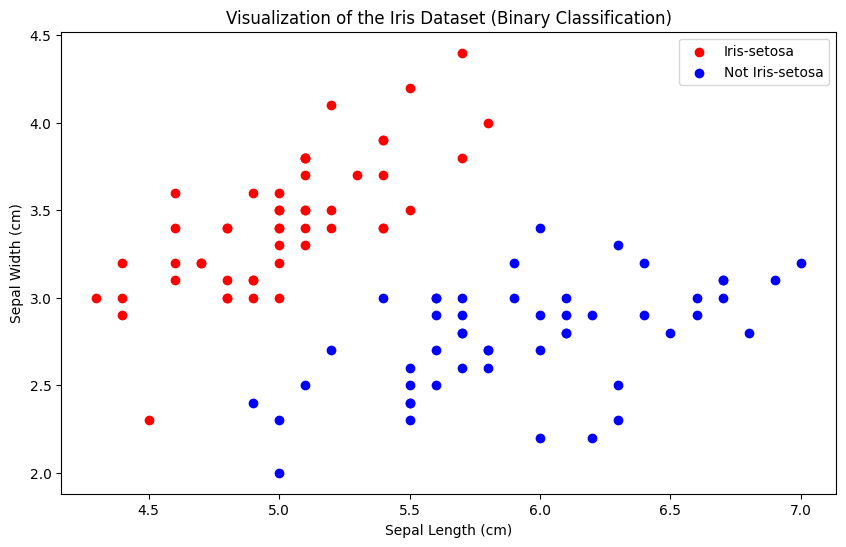

Accuracy: 95.00%


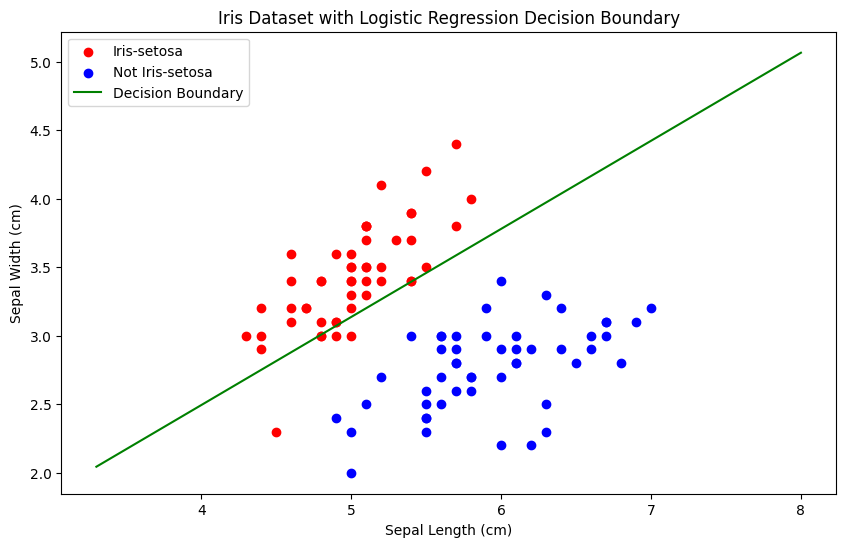

In [ ]:
#2.2 Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Selecting first 100 instances and first two features (sepal length and sepal width)
y = iris.target[:100]  # Selecting first 100 instances for binary classification (Iris-setosa vs. not Iris-setosa)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Iris-setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Not Iris-setosa')

# Labeling the plot
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualization of the Iris Dataset (Binary Classification)')
plt.legend()

plt.show()


# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # To avoid log(0)
    cost = (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
    return cost

# Define the gradient descent function
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X.dot(weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Predict function
def predict(X, weights):
    return sigmoid(X.dot(weights)) >= 0.5

# Loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Selecting first 100 instances and first two features
y = iris.target[:100]  # Selecting first 100 instances

# Adding the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initial weights
weights = np.zeros(X.shape[1])

# Hyperparameters
learning_rate = 0.01
iterations = 100
#Add more iterations


# Train the logistic regression model
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Make predictions
predictions = predict(X, weights)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Define decision boundary line
slope = -(weights[1] / weights[2])
intercept = -(weights[0] / weights[2])

# Generating x-values from the dataset's range
x_values = np.array([min(X[:, 1]) - 1, max(X[:, 1]) + 1])

# Calculating y-values using the decision boundary line equation
y_values = slope * x_values + intercept

# Plotting the dataset and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Iris-setosa')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Not Iris-setosa')
plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset with Logistic Regression Decision Boundary')
plt.legend()

plt.show()




# Sigmoid Function
# def sigmoid(z):
# - Purpose: Calculates the sigmoid function, which is essential for logistic regression. The sigmoid function maps any real-valued number into a value between 0 and 1, making it interpretable as a probability.
# - Parameters:
#   - `z`: The input value(s), which can be a single number, a vector, or a matrix.
# - Returns: The output of the sigmoid function applied to `z`.

# Cost Function
# def cost_function(X, y, weights):
# - Purpose: Computes the cost (or loss) for a given set of weights in the logistic regression model. This function evaluates how well the model's predictions match the actual labels.
# - Parameters:
#   - `X`: The feature dataset.
#   - `y`: The actual labels for the dataset.
#   - `weights`: The weights vector for the logistic regression model.
# - Returns: The computed cost for the current weights.

# Gradient Descent Function
# def gradient_descent(X, y, weights, learning_rate, iterations):
# - Purpose: Optimizes the weights of the logistic regression model by iteratively adjusting them in the direction that reduces the cost function.
# - Parameters:
#   - `X`: The feature dataset.
#   - `y`: The actual labels for the dataset.
#   - `weights`: The initial weights vector.
#   - `learning_rate`: The size of the step the algorithm takes on each iteration.
#   - `iterations`: The number of iterations to run the gradient descent algorithm.
# - Returns: The optimized weights and a history of the cost values for each iteration.

# Predict Function
# def predict(X, weights):
# - Purpose: Makes predictions using the logistic regression model by applying the sigmoid function to the input features and then comparing the output to a threshold (usually 0.5) to determine the class label.
# - Parameters:
#   - `X`: The feature dataset for which to make predictions.
#   - `weights`: The optimized weights of the logistic regression model.
# - Returns: The predicted labels (0 or 1) for each instance in the dataset.


# ### Learning Process
# 1. Initialization: Before learning begins, the model's weights (parameters) are initialized. These weights are what the model will "learn" during the training process. The initial weights can be zeros, random numbers, or other methods for initialization.

# 2. Hypothesis Prediction: In each iteration, the model makes predictions using the current weights. This is done using the sigmoid function applied to the linear combination of input features and their corresponding weights , which produces predictions between 0 and 1.

# 3. Calculating the Gradient: The gradient of the cost function with respect to each weight is calculated. This gradient tells us how to adjust the weights to minimize the cost. It's computed by taking the derivative of the cost function.

# 4. Updating the Weights: The weights are updated by subtracting the product of the learning rate and the gradient from the current weights. This step is crucial because it's where the learning actually happens. The learning rate controls how big a step is taken in the direction that minimally increases the cost function.

# 5. Iteration and Convergence: This process is repeated for a specified number of iterations or until the cost function converges to a minimum value. Convergence means that further adjustments to the weights will not significantly reduce the cost, indicating that the model has learned the best weights given the input data and chosen architecture.

# Memory and Iterations
# - Memory Across Iterations: The "memory" of what the model has learned is stored in the weights. With each iteration, the weights are adjusted closer to the optimal values that minimize the cost function. There's no explicit memory or storage of past data points or gradients; instead, the knowledge is encapsulated in the updated weights after each iteration.

# - Cost History: While the model's knowledge is stored in the weights, the `cost_history` array is kept as a record of the cost function value at each iteration. This doesn't influence the model's learning process but serves as a useful diagnostic tool to monitor the learning process and ensure that the cost is decreasing over time, indicating successful learning.

# - Adaptation in Subsequent Iterations: The gradient calculation inherently considers how well the model's predictions match the actual labels and adjusts the weights in the direction that reduces the cost. This adjustment is based on the aggregate error across all training examples, making the learning process an iterative optimization problem that seeks to find the weight values that best map the input features to the target output.

# The essence of the learning process in logistic regression through gradient descent is an iterative refinement of the model's weights, with each iteration bringing the model closer to the optimal solution that minimizes the discrepancy between predicted and actual values.
